In [1]:
import numpy as np
import pandas as pd
import json

from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.cluster import KMeans, AgglomerativeClustering

from PlottingFunctions import plot_inertia, plot_silhouette


In [2]:
pd.__version__

'1.3.5'

In [3]:
%matplotlib inline
import plotly.express as px
import matplotlib.pyplot as plt

import dataframe_image as dfi

In [4]:
with open('../data/fl_florida_zip_codes_geo.min.json', 'r') as f:
    fla_shapefiles = json.load(f)

In [5]:
total_df = pd.read_csv('../data/total_df2.csv')
total_df_col_set = set(total_df.columns)
total_df

,zip_code,Monthly_Avg_Zip,FL_Unemployment,year,total_pop,households,male_pop,female_pop,median_age,male_under_5,...,occupation_services,management_business_sci_arts_employed,sales_office_employed,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,FLSTHPI_Yearly_Avg,median_pct_increase
0,33160,1866.833333,7.533333,2013,37674,19247,18472,19202,49.6,626,...,2773.0,7911.0,4713.0,935,1346,965,6471,2019,291.6550,0.022971
1,33025,1341.083333,7.533333,2013,57766,21206,27852,29914,32.9,2143,...,5448.0,10806.0,8948.0,2963,3682,3345,18163,4987,291.6550,0.021003
2,33139,1842.666667,7.533333,2013,38066,20883,22090,15976,38.1,981,...,7164.0,9995.0,4865.0,685,649,379,5387,1906,291.6550,0.020404
3,32256,947.750000,7.533333,2013,40024,18039,18865,21159,32.7,1084,...,2597.0,11070.0,6247.0,1638,1598,1629,10962,3429,291.6550,0.027058
4,33009,1443.416667,7.533333,2013,39889,19125,19256,20633,47.1,1213,...,3977.0,5087.0,4958.0,1335,1020,1249,6495,1885,291.6550,0.028284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,33413,1447.583333,3.625000,2018,17473,5099,8493,8980,34.7,762,...,1737.0,2399.0,2423.0,1103,932,848,4875,1107,444.3875,0.021767
637,32204,1008.750000,3.625000,2018,7507,3825,3352,4155,34.0,110,...,454.0,2078.0,737.0,176,201,231,1237,269,444.3875,0.012807
638,32206,719.833333,3.625000,2018,16500,6767,7954,8546,37.4,431,...,2075.0,1476.0,1366.0,956,654,757,3743,809,444.3875,0.007578
639,33172,1747.571429,3.625000,2018,43083,13687,21261,21822,41.4,1422,...,4212.0,6942.0,7067.0,1744,1907,1736,9732,2452,444.3875,-0.041376


In [6]:
total_df = total_df.set_index('zip_code')
total_df.shape

(641, 218)

In [7]:
cluster_subset_cols = ['million_dollar_housing_units', 'unemployed_pop', 
        'median_income', 'poverty', 
        'median_rent', 'percent_income_spent_on_rent']

In [8]:
subset_df = total_df[cluster_subset_cols]
subset_df.shape

(641, 6)

In [ ]:
######### K Means

In [9]:
km = KMeans(n_clusters = 3).fit(subset_df)

In [10]:
km_subset_df = subset_df.copy()
km_subset_df['km_cluster'] = km.labels_
km_subset_df

,million_dollar_housing_units,unemployed_pop,median_income,poverty,median_rent,percent_income_spent_on_rent,km_cluster
zip_code,,,,,,,
33160,821,1260.0,45627.0,5120.0,1258.0,34.0,0
33025,0,3667.0,51822.0,6940.0,1209.0,36.7,0
33139,829,1197.0,46612.0,6672.0,1036.0,31.8,0
32256,74,1943.0,54160.0,3937.0,862.0,28.7,0
33009,96,2823.0,33157.0,8460.0,942.0,39.3,1
...,...,...,...,...,...,...,...
33413,6,485.0,60635.0,1889.0,1275.0,35.8,0
32204,0,273.0,40483.0,2013.0,851.0,31.2,1
32206,20,957.0,26565.0,5398.0,579.0,38.1,1


In [37]:
total_merge_km = pd.merge(total_df, km_subset_df, on = km_subset_df.columns.tolist()[:-1] + ['zip_code'])

In [24]:
total_merge_km

,Monthly_Avg_Zip,FL_Unemployment,year,total_pop,households,male_pop,female_pop,median_age,male_under_5,male_5_to_9,...,management_business_sci_arts_employed,sales_office_employed,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,FLSTHPI_Yearly_Avg,median_pct_increase,km_cluster
zip_code,,,,,,,,,,,,,,,,,,,,,
33160,1866.833333,7.533333,2013,37674,19247,18472,19202,49.6,626,654,...,7911.0,4713.0,935,1346,965,6471,2019,291.6550,0.022971,0
33025,1341.083333,7.533333,2013,57766,21206,27852,29914,32.9,2143,2102,...,10806.0,8948.0,2963,3682,3345,18163,4987,291.6550,0.021003,0
33139,1842.666667,7.533333,2013,38066,20883,22090,15976,38.1,981,513,...,9995.0,4865.0,685,649,379,5387,1906,291.6550,0.020404,0
32256,947.750000,7.533333,2013,40024,18039,18865,21159,32.7,1084,1124,...,11070.0,6247.0,1638,1598,1629,10962,3429,291.6550,0.027058,0
33009,1443.416667,7.533333,2013,39889,19125,19256,20633,47.1,1213,830,...,5087.0,4958.0,1335,1020,1249,6495,1885,291.6550,0.028284,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33413,1447.583333,3.625000,2018,17473,5099,8493,8980,34.7,762,638,...,2399.0,2423.0,1103,932,848,4875,1107,444.3875,0.021767,0
32204,1008.750000,3.625000,2018,7507,3825,3352,4155,34.0,110,143,...,2078.0,737.0,176,201,231,1237,269,444.3875,0.012807,1
32206,719.833333,3.625000,2018,16500,6767,7954,8546,37.4,431,519,...,1476.0,1366.0,956,654,757,3743,809,444.3875,0.007578,1


In [52]:
total_merge_km_group_by_cluster = total_merge_km.groupby('km_cluster')['median_pct_increase']\
    .aggregate(['mean'])

total_merge_km_group_by_cluster = total_merge_km_group_by_cluster.style\
    .hide_columns()\
    .set_caption(
    "Median YOY Rent Change By Cluster, KMeans"
)

total_merge_km_group_by_cluster

0,0.041471
1,0.040510
2,0.036005


In [73]:
dfi.export(total_merge_km_group_by_cluster,"../images/tetris6.png")

In [37]:
total_merge_km.reset_index(inplace=True)
total_merge_km = total_merge_km.rename(columns = {'index':'zipcode'})

In [76]:
# fig = px.choropleth_mapbox(total_merge_km, geojson=fla_shapefiles, locations='zip_code', color='km_cluster',
#                            featureidkey='properties.ZCTA5CE10',
#                            color_continuous_scale="Viridis",
#                            mapbox_style="carto-positron",
#                            zoom=6.5, center = {"lat": 26.6, "lon": -81.0 },
#                            opacity=0.5,
#                           )
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

In [42]:
fig.write_image("../images/tetris.png")

In [54]:

cluster_0_km = total_merge_km[total_merge_km['km_cluster'] == 0]
cluster_1_km = total_merge_km[total_merge_km['km_cluster'] == 1]
cluster_2_km = total_merge_km[total_merge_km['km_cluster'] == 2]


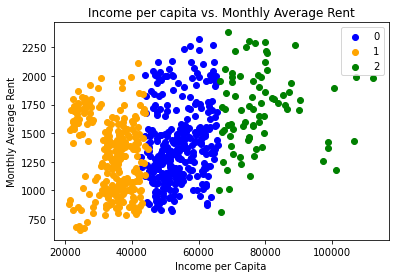

In [81]:
plt.figure()
plt.scatter(cluster_0_km['median_income'], cluster_0_km.Monthly_Avg_Zip, color="blue", label='0')
plt.scatter(cluster_1_km['median_income'], cluster_1_km.Monthly_Avg_Zip, color="orange", label='1')
plt.scatter(cluster_2_km['median_income'], cluster_2_km.Monthly_Avg_Zip, color="green", label='2')
plt.xlabel('Income per Capita')
plt.ylabel('Monthly Average Rent')
plt.legend()
plt.title('Income per capita vs. Monthly Average Rent')
plt.savefig('../images/tetris4.png',  bbox_inches='tight')
plt.show()

In [53]:
########## agglomerative clustering ######

In [45]:
norm_subset_df = pd.DataFrame(normalize(subset_df,axis=0),columns=subset_df.columns)

In [46]:
norm_subset_df

,million_dollar_housing_units,unemployed_pop,median_income,poverty,median_rent,percent_income_spent_on_rent
0,0.141017,0.024526,0.034865,0.025499,0.047640,0.037660
1,0.000000,0.071379,0.039599,0.034563,0.045784,0.040651
2,0.142391,0.023300,0.035618,0.033229,0.039233,0.035223
3,0.012710,0.037821,0.041385,0.019608,0.032643,0.031790
4,0.016489,0.054950,0.025336,0.042133,0.035673,0.043531
...,...,...,...,...,...,...
636,0.001031,0.009441,0.046333,0.009408,0.048283,0.039654
637,0.000000,0.005314,0.030934,0.010025,0.032227,0.034559
638,0.003435,0.018628,0.020299,0.026884,0.021926,0.042202
639,0.000000,0.019251,0.035901,0.030494,0.051010,0.041094


In [47]:
ag = AgglomerativeClustering()
ag.set_params(n_clusters=3)
ag.fit(norm_subset_df)

ag_subset_df = subset_df.copy()
ag_subset_df['cluster'] = ag.labels_
ag_subset_df

,million_dollar_housing_units,unemployed_pop,median_income,poverty,median_rent,percent_income_spent_on_rent,cluster
zip_code,,,,,,,
33160,821,1260.0,45627.0,5120.0,1258.0,34.0,1
33025,0,3667.0,51822.0,6940.0,1209.0,36.7,2
33139,829,1197.0,46612.0,6672.0,1036.0,31.8,1
32256,74,1943.0,54160.0,3937.0,862.0,28.7,0
33009,96,2823.0,33157.0,8460.0,942.0,39.3,2
...,...,...,...,...,...,...,...
33413,6,485.0,60635.0,1889.0,1275.0,35.8,0
32204,0,273.0,40483.0,2013.0,851.0,31.2,0
32206,20,957.0,26565.0,5398.0,579.0,38.1,0


In [48]:
total_merge_ag = pd.merge(total_df, ag_subset_df, on = ag_subset_df.columns.tolist()[:-1] + ['zip_code'])
total_merge_ag

,Monthly_Avg_Zip,FL_Unemployment,year,total_pop,households,male_pop,female_pop,median_age,male_under_5,male_5_to_9,...,management_business_sci_arts_employed,sales_office_employed,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,FLSTHPI_Yearly_Avg,median_pct_increase,cluster
zip_code,,,,,,,,,,,,,,,,,,,,,
33160,1866.833333,7.533333,2013,37674,19247,18472,19202,49.6,626,654,...,7911.0,4713.0,935,1346,965,6471,2019,291.6550,0.022971,1
33025,1341.083333,7.533333,2013,57766,21206,27852,29914,32.9,2143,2102,...,10806.0,8948.0,2963,3682,3345,18163,4987,291.6550,0.021003,2
33139,1842.666667,7.533333,2013,38066,20883,22090,15976,38.1,981,513,...,9995.0,4865.0,685,649,379,5387,1906,291.6550,0.020404,1
32256,947.750000,7.533333,2013,40024,18039,18865,21159,32.7,1084,1124,...,11070.0,6247.0,1638,1598,1629,10962,3429,291.6550,0.027058,0
33009,1443.416667,7.533333,2013,39889,19125,19256,20633,47.1,1213,830,...,5087.0,4958.0,1335,1020,1249,6495,1885,291.6550,0.028284,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33413,1447.583333,3.625000,2018,17473,5099,8493,8980,34.7,762,638,...,2399.0,2423.0,1103,932,848,4875,1107,444.3875,0.021767,0
32204,1008.750000,3.625000,2018,7507,3825,3352,4155,34.0,110,143,...,2078.0,737.0,176,201,231,1237,269,444.3875,0.012807,0
32206,719.833333,3.625000,2018,16500,6767,7954,8546,37.4,431,519,...,1476.0,1366.0,956,654,757,3743,809,444.3875,0.007578,0


In [50]:
total_merge_ag_group_by_cluster = total_merge_ag.groupby('cluster')['median_pct_increase']\
    .aggregate(['mean'])

total_merge_ag_group_by_cluster = total_merge_ag_group_by_cluster.style\
    .hide_columns()\
    .set_caption(
    "Median YOY Rent Change By Cluster, Agglomerative"
)

total_merge_ag_group_by_cluster

0,0.043422
1,0.028761
2,0.038067


In [52]:
dfi.export(total_merge_ag_group_by_cluster,"../images/tetris3.png")

In [44]:
total_merge_ag.reset_index(inplace=True)
total_merge_ag = total_merge_ag.rename(columns = {'index':'zipcode'})

In [50]:
# fig = px.choropleth_mapbox(total_merge_ag, geojson=fla_shapefiles, locations='zip_code', color='cluster',
#                            featureidkey='properties.ZCTA5CE10',
#                            color_continuous_scale="Viridis",
#                            mapbox_style="carto-positron",
#                            zoom=6.5, center = {"lat": 26.6, "lon": -81.0 },
#                            opacity=0.5,
#                           )
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

In [49]:
fig.write_image("../images/tetris2.png")

In [58]:
cluster_0_ag = total_merge_ag[total_merge_ag['cluster'] == 0]
cluster_1_ag = total_merge_ag[total_merge_ag['cluster'] == 1]
cluster_2_ag = total_merge_ag[total_merge_ag['cluster'] == 2]

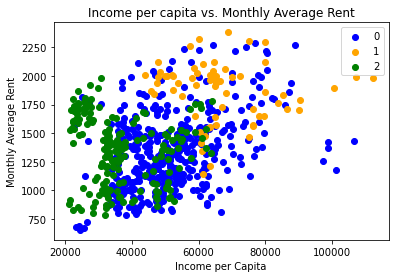

In [82]:
plt.figure()
plt.scatter(cluster_0_ag['median_income'], cluster_0_ag.Monthly_Avg_Zip, color='blue', label='0' )
plt.scatter(cluster_1_ag['median_income'], cluster_1_ag.Monthly_Avg_Zip, color='orange', label='1')
plt.scatter(cluster_2_ag['median_income'], cluster_2_ag.Monthly_Avg_Zip, color='green', label='2')
plt.xlabel('Income per Capita')
plt.ylabel('Monthly Average Rent')
plt.legend()
plt.title('Income per capita vs. Monthly Average Rent')
plt.savefig('../images/tetris5.png',  bbox_inches='tight')
plt.show()